# Проверка гипотез

In [39]:
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm, uniform
from functools import reduce
import numpy as np
import matplotlib
matplotlib.rc('font', size=22)
matplotlib.rc('animation', html='html5')
bigfontsize=20
labelfontsize=16
tickfontsize=16
plt.rcParams.update({'font.size': bigfontsize,
                     'axes.labelsize':labelfontsize,
                     'xtick.labelsize':tickfontsize,
                     'ytick.labelsize':tickfontsize,
                     'legend.fontsize':tickfontsize,
                     })




Для выбора из двух гипотез $M_1$ и $M_0$ в Байесовской статистике используется Байесовский фактор - отношение маргинализированных функций правдоподобия.

$$ B = \frac{\mathcal{L}(D|M_1)}{\mathcal{L}(D|M_0)} $$

Рассмотрим серию бросков монетки и проверим гипотезу о том что эта монетка симметрична (вероятности получить орла и решку равны).

Нулевая гипотеза - монетка симметрична. Функция правдоподобия равна
$$ {\mathcal{L}(D|M_0)} = \frac{1}{2}^N $$

В случае если монетка не симметрична, среднее значение эксперимента Бернулли .удет распределено как  $Beta(\theta|\alpha,\beta)$, где параметры нам не известны. Для данного случая мы можем записать маргинализированную функцию правдоподобия в аналитическом виде:
$$\frac{\mathcal{B}(\alpha_{prior}+N_1,\beta_{prior}+N_0)}{\mathcal{B}(\alpha_{prior},\beta_{prior})} $$
(тут $\mathcal{B}$ это бета-функция, а $\alpha$ и $\beta$ это априорные значения)
Посмотрим как меняется уверенность в симметричности монеты в зависимости от исхода нескольких бросков монеты.

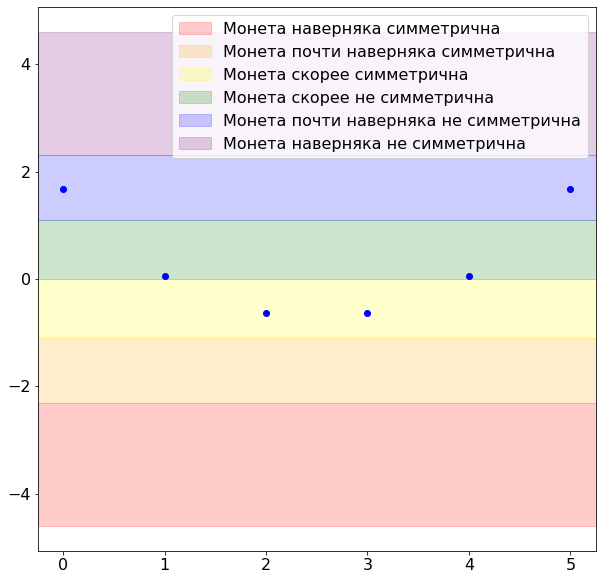

In [40]:
from scipy.special import beta as beta_func
n_toss = 5 # общее число бросков
heads = np.arange(n_toss+1)
a_prior = 1
b_prior = 1
m0_likelihood = [np.log((1/2)**n_toss) for h in heads]
m1_likelihood = [np.log(beta_func(a_prior+h, b_prior+n_toss-h)/beta_func(a_prior, b_prior)) for h in heads]

log_b = np.subtract(m1_likelihood,m0_likelihood)
f = plt.figure(figsize = (10,10))
plt.plot(heads,log_b,'bo')
plt.axhspan(np.log(1/100),np.log(1/10), color = "red", alpha = 0.2,label = "Монета наверняка симметрична")
plt.axhspan(np.log(1/10),np.log(1/3), color = "orange",alpha = 0.2,label = "Монета почти наверняка симметрична")
plt.axhspan(np.log(1/3),np.log(1), color = "yellow", alpha = 0.2,label = "Монета скорее симметрична")
plt.axhspan(np.log(1),np.log(3), color = "green", alpha = 0.2,label = "Монета скорее не симметрична")
plt.axhspan(np.log(3),np.log(10), color = "blue", alpha = 0.2,label = "Монета почти наверняка не симметрична")
plt.axhspan(np.log(10),np.log(100), color = "purple", alpha = 0.2,label = "Монета наверняка не симметрична")
plt.legend()

Функции правдоподобия маргинализированы так как маргинализированы параметры обоих моделей:

$$ \mathcal{L}(D|M) = \int \mathcal{L}(D|M,\theta)p(\theta|M)d\theta $$ 

Таким образом функция правдоподобия свернута с плотностью вероятности параметров модели. Это свойство можно рассматривать как пенальти для сложных моделей.

# A/B тестирование

In [87]:
from scipy.stats import bernoulli, poisson, norm
data_a = bernoulli(0.49).rvs(100)
data_b = bernoulli(0.51).rvs(100)


In [107]:
a = bernoulli(0.49)
b = bernoulli(0.51)

sizes = [100*(i+1) for i in range (0, 100)]

a_vals = a.rvs(sizes[-1])
b_vals = b.rvs(sizes[-1])

a_means = np.array([a_vals[:i].mean() for i in sizes])
b_means = np.array([b_vals[:i].mean() for i in sizes])

a_stds = np.array([a_vals[:i].std()/i**0.5 for i in sizes])
b_stds = np.array([b_vals[:i].std()/i**0.5 for i in sizes])

delta_means = b_means-a_means
delta_stds = (b_stds**2+a_stds**2)**0.5

# ts = (b_means - a_means)/(a_stds**2+b_stds**2)**0.5
# p_vals = 2 * (1 - norm.cdf(ts))

Text(0, 0.5, 'p-value')

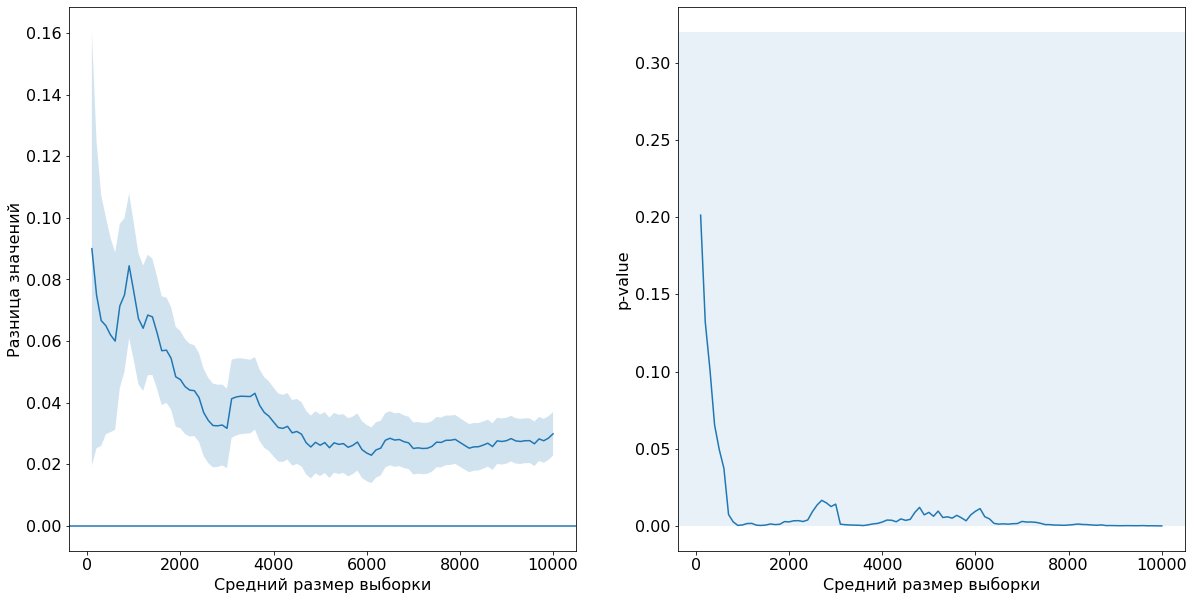

In [109]:
fig, axs = plt.subplots(1, 2, figsize = (20, 10))
axs[0].fill_between(sizes, delta_means-delta_stds, delta_means+delta_stds, alpha = 0.2)
axs[0].plot(sizes,delta_means)
axs[0].axhline(0)
axs[0].set_xlabel("Средний размер выборки")
axs[0].set_ylabel("Разница значений")
axs[1].plot(sizes,p_vals)
axs[1].axhspan(0, 0.32, alpha = 0.1)
axs[1].set_xlabel("Средний размер выборки")
axs[1].set_ylabel("p-value")